In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input, Dense, Conv2D, GaussianNoise
from tensorflow.keras.layers import MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model

### Load mnist data

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [5]:
### rescale and reshape the data

In [6]:
X_train.shape

(60000, 28, 28)

In [7]:
X_train = X_train/255
X_test = X_test/255

X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)

In [8]:
X_train.shape

(60000, 28, 28, 1)

### Encode -Decode model

GaussianNoise is a layer in Keras that adds random noise drawn from a Gaussian distribution (normal distribution) to the input data during training. This layer is typically used as a form of regularization to prevent overfitting by making the model more robust to variations in the input data.

In [9]:
# Define input shape of the images
input_shape = (28, 28, 1)

# Define the encoder
input_img = Input(shape=input_shape)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = GaussianNoise(.5)(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same', name="out")(x)

# Define the decoder
x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)


autoencoder = Model(input_img, decoded)



In [10]:
autoencoder.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 28, 28, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gaussian_noise (GaussianNoise)  │ (None, 28, 28, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 8)      │         1,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 8)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 7, 7, 8)        │           584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ out (MaxPooling2D)              │ (None, 4, 4, 8)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 4, 4, 8)        │           584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d (UpSampling2D)    │ (None, 8, 8, 8)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 8)        │           584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_1 (UpSampling2D)  │ (None, 16, 16, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 14, 14, 16)     │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_2 (UpSampling2D)  │ (None, 28, 28, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 28, 28, 1)      │           145 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,385 (17.13 KB)

 Trainable params: 4,385 (17.13 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
import seaborn as sns

<Axes: >

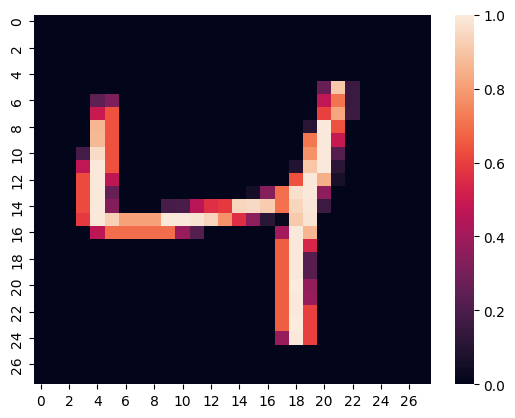

In [18]:
sns.heatmap(X_train[2,:,:,0])

In [19]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [20]:
history = autoencoder.fit(X_train, X_train, epochs=20, verbose=1, batch_size=256, shuffle=True,
               validation_data = (X_test, X_test))

Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 12s 47ms/step - accuracy: 0.7915 - loss: 0.3620 - val_accuracy: 0.7747 - val_loss: 0.2493
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - accuracy: 0.7941 - loss: 0.1971 - val_accuracy: 0.7733 - val_loss: 0.2035
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 12s 49ms/step - accuracy: 0.7989 - loss: 0.1652 - val_accuracy: 0.7767 - val_loss: 0.1843
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 11s 47ms/step - accuracy: 0.8031 - loss: 0.1472 - val_accuracy: 0.7788 - val_loss: 0.1785
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 11s 45ms/step - accuracy: 0.8056 - loss: 0.1371 - val_accuracy: 0.7824 - val_loss: 0.1714
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 11s 45ms/step - accuracy: 0.8067 - loss: 0.1309 - val_accuracy: 0.7880 - val_loss: 0.1602
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 45ms/step - accuracy: 0.8078 - loss: 0.1267 - val_accuracy: 0.7909 - val_loss: 0.1552
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 45ms/step - accuracy: 0.8081 - loss: 0.1234 - 

### reconstruct the data 

In [21]:
reconstructed = autoencoder.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


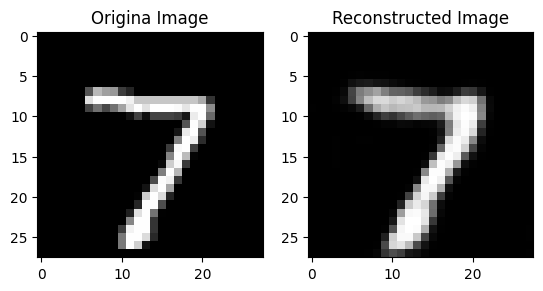

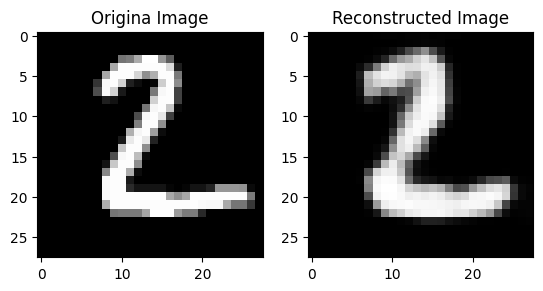

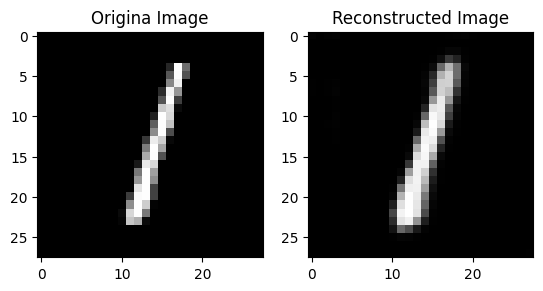

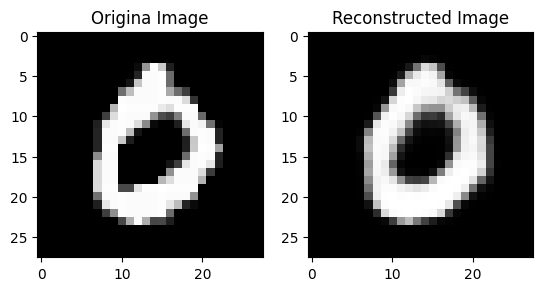

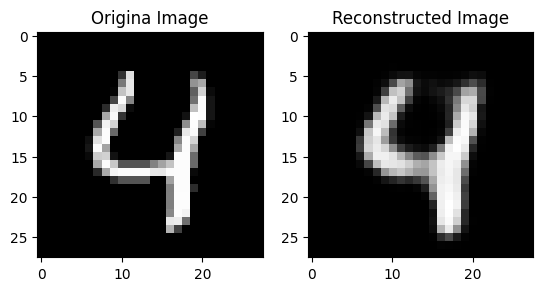

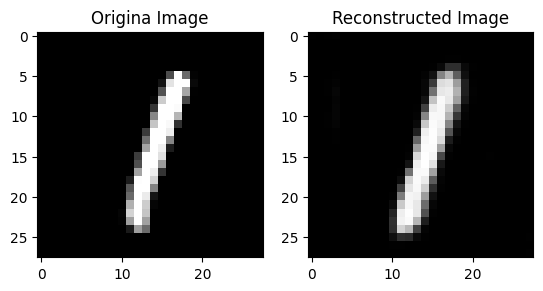

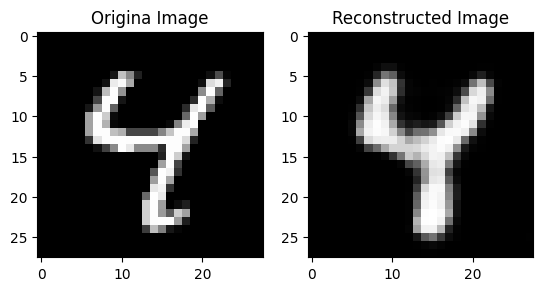

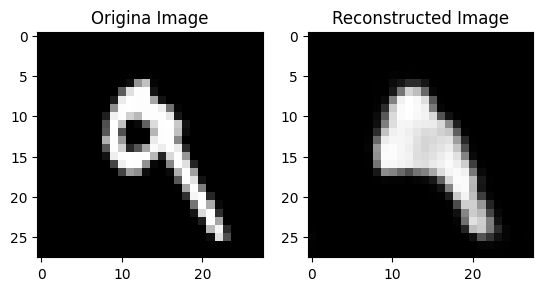

In [23]:
for i in range(8):
    fig, ax = plt.subplots(1, 2)
    ax[0].imshow(X_test[i], cmap='gray')
    ax[1].imshow(reconstructed[i], cmap='gray')
    ax[0].set_title("Origina Image")
    ax[1].set_title("Reconstructed Image")
    plt.show()